In [1]:
# GROUP 10 PROJECT
# UBER
#
# MEMBERS: HUY GIA BUI, ANNA GLUSHCHENKO, LYNN HONG, SANDY KAYAN HUANG,
# JAKE HARRISON HUDELSON, KENJEE KOH, THI NGOC TRAM NGUYEN, SHUANG WU
#
# INSTRUCTOR: PROFESSOR NIAN
# 
# COURSE: DATA AND PROGRAMMING FOR ANALYTICS
#
# DUE: DECEMBER 8 2022




# =========================================================================================
# SECTION 1
#
# DATA CLEANING
# =========================================================================================
"""
========================
Explanation for this cleaning file
========================

This file creates several data frames that we might be interested in analyzing.

For the purpose of this project, we are only focusing on Uber analytics. Hence, this cleaning file filters out all
Lyft rides. Furthermore, we have also decided that in order to yield more accurate predictions without skewed/irregular
data, this cleaning file also filters out Uber Pools, since the nature of Uber Pools and that system is very irregular.

This cleaning file also deletes columns that serve as factors that we are not implementing into our analysis. These
columns include data that are irrelevant to our prediction model. These columns are: id's

The dataframes produced by this file include:
    all_cab_data = All cab data, this includes both Ubers and Lyfts of all kinds
    all_UberX = Only UberX's
    all_UberXL = Only UberXL's
    all_UberBlack = Only Uber Blacks
    all_UberBlackSUV = Only Uber Black SUVs
    all_UberWAV = Only Uber WAVs
    all_ubers = All Ubers EXCLUDING Uber Pools

"""

# Import necessary libraries
import numpy as np
import pandas as pd
from itertools import combinations
from datetime import datetime
import time

# Names for dataframe
names = ["Distance","Cab Type","Time Stamp","Destination","Source","Price","Surge Multiplier","ID","Product ID","Name"]

# Create dataframe for whole csv based on user input file path
import_file_path = str(input('Enter the path of your file: '))
all_cab_data = pd.read_csv(import_file_path, names = names)

# Drop the row that was used as titles because these were considered data
all_cab_data = all_cab_data.drop(0, axis = 0)

# Used fillna from here:
# https://www.geeksforgeeks.org/replace-nan-values-with-zeros-in-pandas-dataframe/
#
# Blank cells from the Uber CSV became "NaN", we need these 0 for calculations.
# This fills these formerly blank cells as zeros in our dataframe object.
all_cab_data["Price"] = all_cab_data["Price"].fillna(0)
all_cab_data["Distance"] = all_cab_data["Distance"].fillna(0)
all_cab_data["Surge Multiplier"] = all_cab_data["Surge Multiplier"].fillna(0)

# Take out Lyft
all_cab_data = all_cab_data[all_cab_data["Cab Type"] == "Uber"]

# Take out 0 values in Price column
all_cab_data = all_cab_data.drop(all_cab_data[all_cab_data.Price == 0].index)

# Take out 0 values in Distance column
all_cab_data = all_cab_data.drop(all_cab_data[all_cab_data.Distance == 0].index)

# ===============================================================
# Need to create binary indicators for qualitative variables concerning types of Uber rides.
# See top of page 3, used this for modeling the qualitatives:
# https://users.wfu.edu/cottrell/ecn215/dummies.pdf
#
# Used this website:
# https://www.geeksforgeeks.org/ways-to-apply-an-if-condition-in-pandas-dataframe/

# Create UberX column
all_cab_data.loc[all_cab_data["Name"] == "UberX", "isUberX"] = 1
all_cab_data.loc[all_cab_data["Name"] != "UberX", "isUberX"] = 0

# Create UberXL column
all_cab_data.loc[all_cab_data["Name"] == "UberXL", "isUberXL"] = 1
all_cab_data.loc[all_cab_data["Name"] != "UberXL", "isUberXL"] = 0

# Create UberBlack column
all_cab_data.loc[all_cab_data["Name"] == "UberBlack", "isUberBlack"] = 1
all_cab_data.loc[all_cab_data["Name"] != "UberBlack", "isUberBlack"] = 0

# Create UberBlackSUV column
all_cab_data.loc[all_cab_data["Name"] == "UberBlackSUV", "isUberBlackSUV"] = 1
all_cab_data.loc[all_cab_data["Name"] != "UberBlackSUV", "isUberBlackSUV"] = 0

# Create UberWAV column
all_cab_data.loc[all_cab_data["Name"] == "UberWAV", "isUberWAV"] = 1
all_cab_data.loc[all_cab_data["Name"] != "UberWAV", "isUberWAV"] = 0

# The below for loop uses 
# https://www.geeksforgeeks.org/how-to-convert-timestamp-string-to-datetime-object-in-python/
# For Date column
theDates = []
# For Hour column
theHours = []
for row in all_cab_data["Time Stamp"]:
    dateTimeObject = (datetime.fromtimestamp(int(row) / 1000.0))
    # Create Date Column
    # Divide by 1000.0 to take out the milliseconds
    theDates.append(dateTimeObject)
    # Create Hour Column
    # Uses:
    # https://www.geeksforgeeks.org/extract-time-from-datetime-in-python/
    theHours.append(dateTimeObject.time().hour)

all_cab_data["Date"] = theDates
all_cab_data["Date (Hour)"] = theHours

# Used:
# https://www.geeksforgeeks.org/pandas-groupby-count-occurrences-in-column/
#
# Get the sum of how many rows there are in the dataset
occurrences = all_cab_data.groupby(["Date (Hour)"]).size()
theOccurrencesSum = 0
for hourCount in occurrences:
    theOccurrencesSum+= hourCount

# Get the cumulative distribution of hours
cumulativeDistributionOfDateHours = []
for row in range(0,24):
    cumulativeDistributionOfDateHours.append(occurrences[row] / theOccurrencesSum)

# Create the column to append
cumulativeDistributionOfDateHoursForColumn = []
for row in all_cab_data["Date (Hour)"]:
    cumulativeDistributionOfDateHoursForColumn.append(cumulativeDistributionOfDateHours[int(row)])
    
# Append "Date (Hour) CMD" column to all_cab_data
all_cab_data["Date (Hour) CMD"] = cumulativeDistributionOfDateHoursForColumn



# all_cab_data = pd.read_csv(r"C:\Users\Kenjee\Desktop\Coding\[UCI] MGMT 172\Group Project\cab_rides.csv")
# ^ If hardcoded

# We need to create filters for all Uber types EXCEPT UberPools
# Filters data to show only UberX
all_UberX = all_cab_data[all_cab_data.Name == 'UberX']

# Filters data to show only UberXL
all_UberXL = all_cab_data[all_cab_data.Name == 'UberXL']

# Filters data to show only Uber Black
all_UberBlack = all_cab_data[all_cab_data.Name == 'Black']

# Filters data to show only Uber Black SUV
all_UberBlackSUV = all_cab_data[all_cab_data.Name == 'Black SUV']

# Filters data to show only Uber WAV
all_UberWAV = all_cab_data[all_cab_data.Name == 'WAV']

# Shows all Ubers by concatenating above dataframes. Also drops columns we aren't interested in (id's).
#all_ubers = pd.concat([all_UberX, all_UberXL, all_UberBlack, all_UberBlackSUV, all_UberWAV])
#all_ubers = all_ubers.drop(['id', 'destination', 'source', 'product_id'], axis=1)

# Reset indexes of the all_cab_data dataframe
all_cab_data = all_cab_data.reset_index(drop=True)

print(all_cab_data)

Enter the path of your file: /Users/jakehudelson/ProgramsUniPython/MGMT172/Project/cab_rides.csv


/var/folders/kr/tt_mjvxx7qg2mndx54z373yw0000gn/T/ipykernel_24322/1354465859.py:43: DtypeWarning: Columns (0,2,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  all_cab_data = pd.read_csv(import_file_path, names = names)


       Distance Cab Type     Time Stamp Destination     Source Price  \
0          1.11     Uber  1543615981179    West End  North End    12   
1          1.11     Uber  1544698211014    West End  North End    16   
2          1.11     Uber  1544728503935    West End  North End   7.5   
3          1.11     Uber  1545004511430    West End  North End   7.5   
4          1.11     Uber  1544748007961    West End  North End    26   
...         ...      ...            ...         ...        ...   ...   
330563      1.0     Uber  1543708385534   North End   West End   9.5   
330564      1.0     Uber  1543708385534   North End   West End  13.0   
330565      1.0     Uber  1543708385534   North End   West End   9.5   
330566      1.0     Uber  1543708385534   North End   West End  27.0   
330567      1.0     Uber  1543708385534   North End   West End  10.0   

       Surge Multiplier                                    ID  \
0                     1  009e9c53-074d-43cf-aef2-0fbc7a47ed3d   
1    

In [2]:
# =========================================================================================
# SECTION 2
#
# CREATING INPUTS FOR THE LINEAR LEAST SQUARES PREDICTION MODEL
# =========================================================================================

# =================================================================
# PREDICTION PART 1:
# Load up variables for prediction
# =================================================================

'''
========================
Explanation for the prediction algorithm
========================

The prediction algorithm is a linear least squares regression algorithm.
The algorithm uses linear algebra to find the vector which minimizes the difference between
actual and predicted price to take an Uber, given certain variables.
We then use combinatorial techniques to find which set of variables produce the lowest
difference between actual and predicted price to take an Uber.

Ex:

a * x = y

In our project, "a" is a matrix where columns are variables we want to test for
prediction capability. "x" is what we are predicting. "y" is the actual price to
take an Uber. Rows are dates.

This means we are finding the "x" such that, when multiplied by "a", our result is
as close to the actual "y" as possible.

Ex:
This is our formula:
|1.2   1.0|          |x1|                     |10|
|1.1   1.0|    dot   |x2|            equals   |11|
|3.4   1.0|                                   |12|
|2.3   1.0|                                   |16|

In this example, we are testing our first variable Distance with distances of
1.2, 1.1, 3.4, and 2.3 miles. When each of these Uber rides were taken, there
was a Surge Multiplier of 1.0 (our second variable is Surge Multiplier).
The prices for these rides are $10, $11, $12, and $16, respectively.
We are trying to compute x1 and x2 such that the predicted value in the multiplication
is as close to the actual prices as possible.

Result of the algorithm:

|1.2   1.0|          |1.05714286 |            |11.40428571|
|1.1   1.0|    dot   |10.13571429|   equals   |11.29857143|
|3.4   1.0|                                   |13.73      |
|2.3   1.0|                                   |12.56714286|

As we can see, using Distance and Surge Multiplier are mostly inaccurate.
The second row's predicted value is close to its actual value, but other rows are off.

Now, let's substitute Surge Multiplier for the actual price:

|1.2   10|          |x1|            |11.40428571|
|1.1   11|    dot   |x2|   equals   |11.29857143|
|3.4   12|                          |13.73      |
|2.3   16|                          |12.56714286|

Result of the algorithm:
|1.2   10|          |0|            |10|
|1.1   11|    dot   |1|   equals   |11|
|3.4   12|                         |12|
|2.3   16|                         |16|

When we use the actual price as a variable, we are able to 100% predict the actual price.
This should make sense, because we already know the end result.
In reality, we cannot use the dependent variable as an independent variable, but we can hope
to use variables that get us as close as possible.

This program will compile a list of all possible combinations of variables that it can plug
into the algorithm, then find the combination that best predicts the price.


'''
# Get the columns to be used for a and y

# Price of each ride
thePrices = all_cab_data.loc[:,"Price"]
# Distance of each ride
theDistances = all_cab_data.loc[:,"Distance"]
# Surge multiplier for each ride
theSurgeMultipliers = all_cab_data.loc[:,"Surge Multiplier"]
# Is this specific ride an Uber X?
theIsUberXs = all_cab_data.loc[:,"isUberX"]
# Is this specific ride an Uber XL?
theIsUberXLs = all_cab_data.loc[:,"isUberXL"]
# Is this specific ride an Uber Black?
theIsUberBlacks = all_cab_data.loc[:,"isUberBlack"]
# Is this specific ride an Uber Black SUV?
theIsUberBlackSUVs = all_cab_data.loc[:,"isUberBlackSUV"]
# Is this specific ride an Uber WAV?
theIsUberWAVs = all_cab_data.loc[:,"isUberWAV"]
# Cumulative distribution of date hours.
# Ex: If n total rides, 30 rides are at hour 5, this value is "30/n" for all
# rides at hour 5
theDateHourCMDs = all_cab_data.loc[:,"Date (Hour) CMD"]

vectorOfPrices = []
vectorOfDistances = []
vectorOfSurgeMultipliers = []
vectorOfIsUberX = []
vectorOfIsUberXL = []
vectorOfIsUberBlack = []
vectorOfIsUberBlackSUV = []
vectorOfIsUberWAV = []
vectorOfDateHourCMDs = []

# Create lists of the above columns
for price in thePrices:
    vectorOfPrices.append(float(price))

for distance in theDistances:
    vectorOfDistances.append(float(distance))

for surge_multiplier in theSurgeMultipliers:
    vectorOfSurgeMultipliers.append(float(surge_multiplier))
    
for isUberX in theIsUberXs:
    vectorOfIsUberX.append(float(isUberX))
    
for isUberXL in theIsUberXLs:
    vectorOfIsUberXL.append(float(isUberXL))

for isUberBlack in theIsUberBlacks:
    vectorOfIsUberBlack.append(float(isUberBlack))
    
for isUberBlackSUV in theIsUberBlackSUVs:
    vectorOfIsUberBlackSUV.append(float(isUberBlackSUV))

for isUberWAV in theIsUberWAVs:
    vectorOfIsUberWAV.append(float(isUberWAV))
    
for dateHourCMD in theDateHourCMDs:
    vectorOfDateHourCMDs.append(float(dateHourCMD))

# listOfVectors is iterable for combinatorial calculations
# listOfVectorsNames is the associated name of the actual variable.
# Ex: Index 0 in listOfVectors might be [1.2, 1.1, 3.4, 2.3] from the above example.
#     Index 0 in listOfVectorsNames would then be "Distance"
listOfVectors = []
listOfVectorsNames = []

listOfVectors.append(np.array(vectorOfDistances))
listOfVectorsNames.append("Distance")

listOfVectors.append(np.array(vectorOfSurgeMultipliers))
listOfVectorsNames.append("Surge Multipliers")

listOfVectors.append(np.array(vectorOfIsUberX))
listOfVectorsNames.append("Is Uber X?")

listOfVectors.append(np.array(vectorOfIsUberXL))
listOfVectorsNames.append("Is Uber XL?")

listOfVectors.append(np.array(vectorOfIsUberBlack))
listOfVectorsNames.append("Is Uber Black?")

listOfVectors.append(np.array(vectorOfIsUberBlackSUV))
listOfVectorsNames.append("Is Uber Black SUV?")

listOfVectors.append(np.array(vectorOfIsUberWAV))
listOfVectorsNames.append("Is Uber WAV?")

listOfVectors.append(np.array(vectorOfDateHourCMDs))
listOfVectorsNames.append("Date (Hour) CMD")

# This must always be the last one appended!
# It is the dependent variable.
listOfVectors.append(np.array(vectorOfPrices))
listOfVectorsNames.append("Prices")

# For use in SECTION 3: REGRESSION TREE PREDICTION MODEL
#
# listOfVectors is a list, but for SECTION 3: REGRESSION TREE PREDICTION MODEL,
# We need listOfVectors to be of type np.array, therefore we are creating a new
# variable meant to be identical to listOfVectors called listOfVectorsNParray
#
# Tranpose it with .T because we need rows to be instances, not variable types
# Ex: We need row one to have the distance, surg mult. etc of first ride,
# row two to have the distance, surg mult. etc. of second ride, and so on
listOfVectorsNParray = np.array([vectorOfDistances,
                               vectorOfSurgeMultipliers,
                               vectorOfIsUberX,
                               vectorOfIsUberXL,
                               vectorOfIsUberBlack,
                               vectorOfIsUberBlackSUV,
                               vectorOfIsUberWAV,
                               vectorOfDateHourCMDs,
                                 vectorOfPrices]
                               ).T



In [3]:
# Find mean prices, for use in conclusion
import statistics
print(statistics.mean(vectorOfPrices))

15.795343166912708


In [4]:
from itertools import combinations
# =========================================================================================
# SECTION 2
#
# LINEAR LEAST SQUARES PREDICTION MODEL
# =========================================================================================

# =================================================================
# PREDICTION PART 2:
# Perform prediction
# =================================================================
# Used this article for guidance on incorporating qualitative variables into the model
# (Specifically the top of page 3, the matrix of zeros and ones):
# https://users.wfu.edu/cottrell/ecn215/dummies.pdf

# Minus one becasue the Price is not an independent variable
amountOfVariables = len(listOfVectors) - 1

indexOfDependentVariable = len(listOfVectors) - 1

# We need a list with indices for parsing.
# Ex: If we have two variables Distance and Surge Multiplier, we
#     need a list of [0,1] to parse through them.
listOfVariableIndices = []
for number in range(0,amountOfVariables):
    listOfVariableIndices.append(number)

listOfCombinationsOfVariableIndices = []

# Plus one to ensure we get the maximum number of variables in individual combination.
# Ex: Want all combinations of set (0,1,2,3,4,5)
#     Max will be 6 because it's upper bound in Range: (len(listOfVariableIndices) + 1)
#
# Used combinations function and for loop structure from this source:
# https://datagy.io/python-combinations-of-a-list/
for numberOfVariablesInIndividualCombination in range(2,len(listOfVariableIndices) + 1):
    listOfCombinationsOfVariableIndices = listOfCombinationsOfVariableIndices + (list(combinations(listOfVariableIndices,numberOfVariablesInIndividualCombination)))

#print(listOfCombinationsOfVariableIndices)

# Stores our final result
lowestAverageDifference = 0
variableIndicesOfLowestAverageDifference = []
# This predictedValuesOfLowestAverageDifference is used for graphing
predictedValuesOfLowestAverageDifference = []

# Go through each combination, and test it against our working final result
for combination in listOfCombinationsOfVariableIndices:
    listOfArraysForCombination = []
    #print(combination)
    
    # Fill listOfArraysForCombination with all numpy arrays for use in linear regression
    for theArray in combination:
        listOfArraysForCombination.append(listOfVectors[theArray])
    
    # We can manually do indicies 0 and 1 because for the 
    # linear least squares regression algorithm to work, there need to be at least
    # two variables
    a = np.array([listOfArraysForCombination[0], listOfArraysForCombination[1]])
    
    # If we have more variables, we must input those.
    if len(combination) > 2:
        # Start with the third vector because we already merged the first two
        for theArray in range(2, len(combination)):
            a = np.vstack([a,listOfArraysForCombination[theArray]])
    # Transpose a for calculations
    a = a.T
    # Find x
    # [0] at the end because our price is one dimensional.
    x = np.linalg.lstsq(a,listOfVectors[indexOfDependentVariable],rcond=None)[0]
    
    # Difference between predicted and actual price
    # This creates a vector with rows = number of rides, with one column = difference
    # in price
    difference = abs(np.dot(a,x) - listOfVectors[indexOfDependentVariable])
    
    # Calculate the average difference
    averageDifference = 0.0
    total = 0.0
    for number in difference:
        total = total + number
    averageDifference = total / len(difference)
    
    # below line is for testing -- if we want to see the difference for each combination
    #print("Average difference for " + str(combination) + " is " + str(averageDifference))
    
    #print(averageDifference)
    
    # If the first combination has just been tested, then this is the lowest average difference
    if combination == listOfCombinationsOfVariableIndices[0]:
        lowestAverageDifference = averageDifference
        variableIndicesOfLowestAverageDifference = combination
        predictedValuesOfLowestAverageDifference = np.dot(a,x)
    
    # If this is not the first combination tested, see if this result is the best result
    else:
        if averageDifference < lowestAverageDifference:
            lowestAverageDifference = averageDifference
            variableIndicesOfLowestAverageDifference = combination
            predictedValuesOfLowestAverageDifference = np.dot(a,x)

# Print results
print("The lowest average difference is $" + str(lowestAverageDifference))
print()
print("This is from variables: ")
for index in range(0,len(variableIndicesOfLowestAverageDifference)):
    print(listOfVectorsNames[index])
print()
print("Out of possible variables: ")
# Minus one because we don't want to say Price. This is not an independent variable.
for index in range(0,len(listOfVectorsNames) - 1):
    print(listOfVectorsNames[index])
    

The lowest average difference is $5.918721977601849

This is from variables: 
Distance
Surge Multipliers
Is Uber X?
Is Uber XL?
Is Uber Black?

Out of possible variables: 
Distance
Surge Multipliers
Is Uber X?
Is Uber XL?
Is Uber Black?
Is Uber Black SUV?
Is Uber WAV?
Date (Hour) CMD


'\n# Transpose for linear algebra operations on matrices^\na = np.array([listOfVectors[0], listOfVectors[1]]).T\nx = np.linalg.lstsq(a,listOfVectors[len(listOfVectors) - 1],rcond = None)[0]\n\n# The x\n#print(x)\n# The predicted price\n#print(np.dot(a,x))\n# Difference between predicted and actual price\ndifference = abs(np.dot(a,x) - listOfVectors[len(listOfVectors) - 1])\n# Print the average difference\naverageDifference = 0.0\ntotal = 0.0\nfor number in difference:\n    total = total + number\naverageDifference = total / len(difference)\n'

In [5]:
# =========================================================================================
# SECTION 3
#
# REGRESSION TREE PREDICTION MODEL
# =========================================================================================

In [6]:
from sklearn.tree import DecisionTreeRegressor
import statistics

# For regression tree, used parts of the framework from this source:
# https://www.geeksforgeeks.org/python-decision-tree-regression-using-sklearn/

# "squared_error" is equivalent to mean square error
# This is the regression tree model
theModel = DecisionTreeRegressor(criterion = "squared_error")

# To keep track of the lowest average difference.
# Ex: Given variables 0, 1, 2, there is an avg difference, but
# maybe variables 0, 1, 5 have a lower avg difference, when fed into the model
lowestAverageDifferenceRegressionTree = 0.0
lowestDifferenceRegressionTree = []
variableIndicesOfLowestAverageDifferenceRegressionTree = []
predictedValuesOfLowestAverageDifferenceRegressionTree = []

# numberOfCombinations is purely for output because the below for loop takes about 45
# minutes to complete.
numberOfCombinations = 0

# Test all combinations
for combination in listOfCombinationsOfVariableIndices:
    # For tracking progress of computation
    numberOfCombinations+=1
    
    # Only for storage within this for loop
    tempPredictedValuesOfLowestAverageDifferenceRegressionTree = []
    
    # Fit the regression tree with a certain combination of variables
    theModel.fit(listOfVectorsNParray[:,list(combination)].astype(float),listOfVectorsNParray[:,-1].astype(float))
    
    # Given this combination, Find the difference between predicted price and actual price
    total = 0.0
    
    # For use in calculating the median
    listOfDifferences = []
    # For each ride, find the difference between predicted price and actual price
    for ride in range(0,len(listOfVectorsNParray)):
        prediction = theModel.predict([listOfVectorsNParray[ride][list(combination)]])
        tempPredictedValuesOfLowestAverageDifferenceRegressionTree.append(prediction)
        difference = abs(prediction - listOfVectorsNParray[ride][-1])
        listOfDifferences.append(float(difference))
        total = total + difference
        
    # Average these differences for the averageDifference using this combination
    averageDifference = total / len(listOfVectorsNParray)
    
    print("Finished combination " + str(numberOfCombinations) + "/" + str(len(listOfCombinationsOfVariableIndices)) + ": " + str(averageDifference))
    
    # If the first combination has just been tested, then this is the lowest average difference
    if combination == listOfCombinationsOfVariableIndices[0]:
        lowestAverageDifferenceRegressionTree = averageDifference
        variableIndicesOfLowestAverageDifferenceRegressionTree = combination
        predictedValuesOfLowestAverageDifferenceRegressionTree = tempPredictedValuesOfLowestAverageDifferenceRegressionTree
        lowestDifferenceRegressionTree = listOfDifferences
        
    # If this is not the first combination tested, see if this result is the best result
    else:
        if averageDifference < lowestAverageDifference:
            lowestAverageDifferenceRegressionTree = averageDifference
            variableIndicesOfLowestAverageDifferenceRegressionTree = combination
            predictedValuesOfLowestAverageDifferenceRegressionTree = tempPredictedValuesOfLowestAverageDifferenceRegressionTree
            lowestDifferenceRegressionTree = listOfDifferences
            
# Print results
print("The lowest average difference is $" + str(lowestAverageDifferenceRegressionTree))
print()
print("The median difference is $" + str(statistics.median(lowestDifferenceRegressionTree)))
print("This is from variables: ")
for index in range(0,len(variableIndicesOfLowestAverageDifferenceRegressionTree)):
    print(listOfVectorsNames[index])
print()
print("Out of possible variables: ")
# Minus one because we don't want to say Price. This is not an independent variable.
for index in range(0,len(listOfVectorsNames) - 1):
    print(listOfVectorsNames[index])

Finished combination 1/247: [6.68997385]
Finished combination 2/247: [5.94165698]
Finished combination 3/247: [6.66676181]
Finished combination 4/247: [6.68997385]
Finished combination 5/247: [6.68997385]
Finished combination 6/247: [6.68997385]
Finished combination 7/247: [6.61355709]
Finished combination 8/247: [6.45367447]
Finished combination 9/247: [7.03976607]
Finished combination 10/247: [7.03665336]
Finished combination 11/247: [7.03665336]
Finished combination 12/247: [7.03665336]
Finished combination 13/247: [7.03628725]
Finished combination 14/247: [6.4403349]
Finished combination 15/247: [6.45367447]
Finished combination 16/247: [6.45367447]
Finished combination 17/247: [6.45367447]
Finished combination 18/247: [6.45411458]
Finished combination 19/247: [7.03976607]
Finished combination 20/247: [7.03976607]
Finished combination 21/247: [7.03976607]
Finished combination 22/247: [7.03909394]
Finished combination 23/247: [7.03665336]
Finished combination 24/247: [7.03665336]
Fi

In [8]:
pricingDataFrame = pd.DataFrame(all_cab_data["Price"].astype(float))
pricingDataFrame["LLSR"] = predictedValuesOfLowestAverageDifference
pricingDataFrame["LLSR Diff"] = pricingDataFrame['LLSR'] - pricingDataFrame['Price']
pricingDataFrame["Regression Tree"] = predictedValuesOfLowestAverageDifferenceRegressionTree
pricingDataFrame["Regression Tree"] = pricingDataFrame["Regression Tree"].astype(float)
pricingDataFrame["Regression Diff"] = pricingDataFrame['Regression Tree'] - pricingDataFrame['Price']
print(pricingDataFrame)



        Price       LLSR  LLSR Diff  Regression Tree  Regression Diff
0        12.0  13.038375   1.038375        12.863636         0.863636
1        16.0  14.678194  -1.321806        13.500000        -2.500000
2         7.5   7.142367  -0.357633         7.833333         0.333333
3         7.5  14.663733   7.163733        14.418605         6.918605
4        26.0  14.666328 -11.333672        14.354545       -11.645455
...       ...        ...        ...              ...              ...
330563    9.5  14.395213   4.895213        12.440000         2.940000
330564   13.0  12.741143  -0.258857        13.214286         0.214286
330565    9.5   6.828022  -2.671978         7.863636        -1.636364
330566   27.0  14.395213 -12.604787        12.440000       -14.560000
330567   10.0  14.395213   4.395213        12.440000         2.440000

[330568 rows x 5 columns]


In [9]:
# =========================================================================================
# SECTION 4
#
# VISUALIZATION
# =========================================================================================

"""
Here, we use the pandas and matplotlib library to create three different plots:
    1. Each ride's Actual Price
    2. Each ride's Actual Price vs Linear Least Square Regression (LLSR) Predicted Price
    3. Each ride's Actual Price vs Regression Tree Predicted Price
    4. Each ride's Actual Price vs LLSR vs Regression Tree Price

"""
# Imports
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd


Text(0.5, 1.0, "Each Ride's Actual Price (Rides 0-14)")

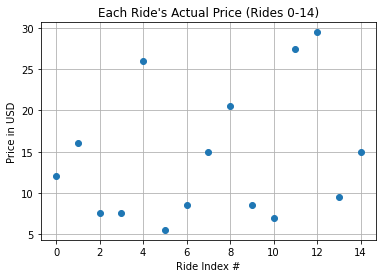

In [10]:
# =========================================================================================
# SECTION 4 - 1
#
# VISUALIZATION
# 1. Each ride's Actual Price
# =========================================================================================

# Plotting Rows 0-14
Plot1_1 = pricingDataFrame.iloc[0:15, 0].plot(grid=True, style='o')
Plot1_1.set_xlabel('Ride Index #')
Plot1_1.set_ylabel('Price in USD')
Plot1_1.set_title("Each Ride's Actual Price (Rides 0-14)")


Text(0, 0.5, 'Price in USD')

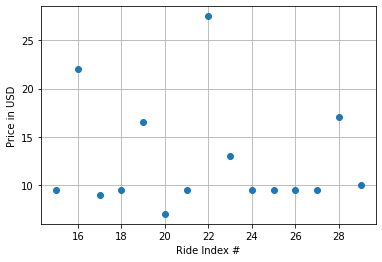

In [11]:
# Plotting Rows 15-29
Plot1_2 = pricingDataFrame.iloc[15:30, 0].plot(grid=True, style='o')
Plot1_2.set_xlabel('Ride Index #')
Plot1_2.set_ylabel('Price in USD')

Text(0, 0.5, 'Price in USD')

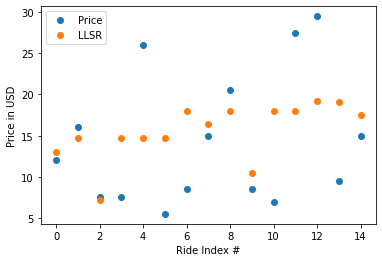

In [12]:
# =========================================================================================
# SECTION 4 - 2
#
# VISUALIZATION
# 2. Each ride's Actual Price vs Linear Least Square Regression (LLSR) Predicted Price
# =========================================================================================

# Plotting Rows 0-14
Plot2_1 = pricingDataFrame.iloc[0:15, 0:2].plot(style='o')
Plot2_1.set_xlabel('Ride Index #')
Plot2_1.set_ylabel('Price in USD')

Text(0.5, 1.0, "Each Ride's Actual Price (Rides 15-29)")

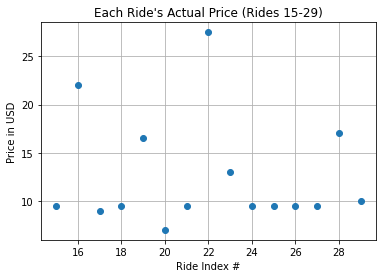

In [13]:
# Plotting Rows 15-29
Plot1_2 = pricingDataFrame.iloc[15:30, 0].plot(grid=True, style='o')
Plot1_2.set_xlabel('Ride Index #')
Plot1_2.set_ylabel('Price in USD')
Plot1_2.set_title("Each Ride's Actual Price (Rides 15-29)")

Text(0.5, 1.0, "Each Ride's Actual Price vs Linear Least Square Regression (LLSR) Predicted Price (Rides 0-14)")

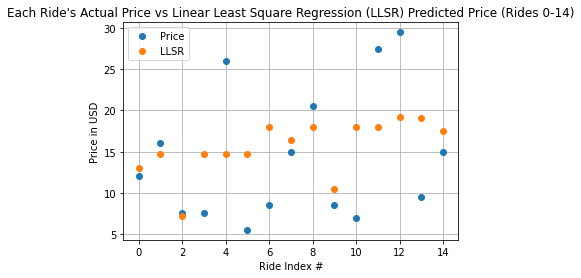

In [14]:
# =========================================================================================
# SECTION 4 - 2
#
# VISUALIZATION
# 2. Each ride's Actual Price vs Linear Least Square Regression (LLSR) Predicted Price
# =========================================================================================

# Plotting Rows 0-14
Plot2_1 = pricingDataFrame.iloc[0:15, 0:2].plot(grid= True, style='o')
Plot2_1.set_xlabel('Ride Index #')
Plot2_1.set_ylabel('Price in USD')
Plot2_1.set_title("Each Ride's Actual Price vs Linear Least Square Regression (LLSR) Predicted Price (Rides 0-14)")

Text(0.5, 1.0, "Each Ride's Actual Price vs Linear Least Square Regression (LLSR) Predicted Price (Rides 15-29)")

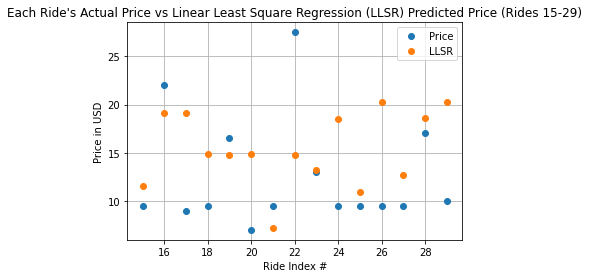

In [15]:
# Plotting Rows 15-29
Plot2_2 = pricingDataFrame.iloc[15:30, 0:2].plot(grid= True, style='o')
Plot2_2.set_xlabel('Ride Index #')
Plot2_2.set_ylabel('Price in USD')
Plot2_2.set_title("Each Ride's Actual Price vs Linear Least Square Regression (LLSR) Predicted Price (Rides 15-29)")

Text(0.5, 1.0, "Each Ride's Actual Price vs Regression Tree Predicted Price (Rides 0-14)")

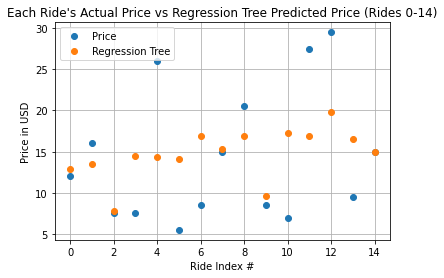

In [16]:
# =========================================================================================
# SECTION 4 - 3
#
# VISUALIZATION
# 3. Each ride's Actual Price vs Regression Tree Predicted Price
# =========================================================================================

# Plotting Rows 0-14
Plot3_1 = pricingDataFrame.iloc[0:15, [0,3]].plot(grid=True, style='o')
Plot3_1.set_xlabel('Ride Index #')
Plot3_1.set_ylabel('Price in USD')
Plot3_1.set_title("Each Ride's Actual Price vs Regression Tree Predicted Price (Rides 0-14)")

Text(0.5, 1.0, "Each Ride's Actual Price vs Regression Tree Predicted Price (Rides 15-29)")

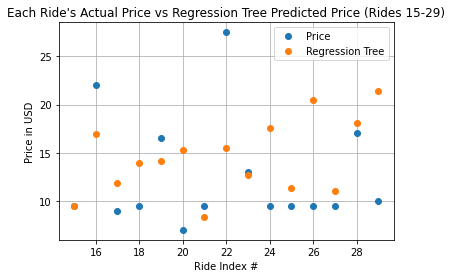

In [17]:
# Plotting Rows 15-29
Plot3_2 = pricingDataFrame.iloc[15:30, [0,3]].plot(grid=True, style='o')
Plot3_2.set_xlabel('Ride Index #')
Plot3_2.set_ylabel('Price in USD')
Plot3_2.set_title("Each Ride's Actual Price vs Regression Tree Predicted Price (Rides 15-29)")

In [18]:
# =========================================================================================
# SECTION 4 - 4
#
# VISUALIZATION
# 4. Each ride's Actual Price vs LLSR vs Regression Tree Price
# =========================================================================================

Text(0.5, 1.0, "Each Ride's Actual Price vs LLSR Predicted Price vs Regression Tree Predicted Price (Rides 0-14)")

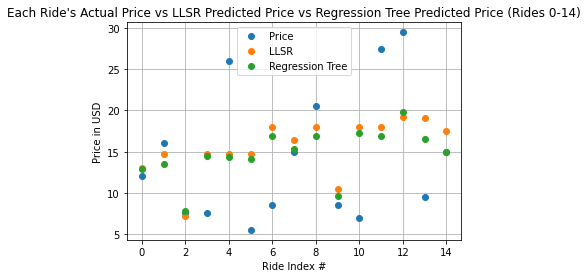

In [19]:
Plot4_1 = pricingDataFrame.iloc[0:15, [0,1,3]].plot(grid=True, style='o')
Plot4_1.set_xlabel('Ride Index #')
Plot4_1.set_ylabel('Price in USD')
Plot4_1.set_title("Each Ride's Actual Price vs LLSR Predicted Price vs Regression Tree Predicted Price (Rides 0-14)")

Text(0.5, 1.0, "Each Ride's Actual Price vs LLSR Predicted Price vs Regression Tree Predicted Price (Rides 15-29)")

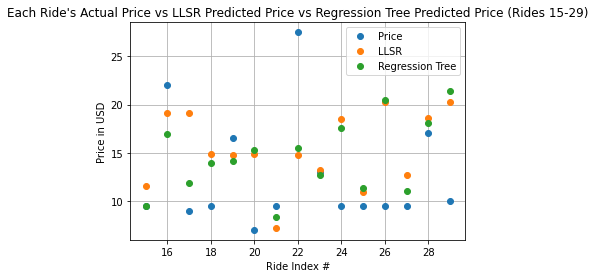

In [20]:
Plot4_2 = pricingDataFrame.iloc[15:30, [0,1,3]].plot(grid=True, style='o')
Plot4_2.set_xlabel('Ride Index #')
Plot4_2.set_ylabel('Price in USD')
Plot4_2.set_title("Each Ride's Actual Price vs LLSR Predicted Price vs Regression Tree Predicted Price (Rides 15-29)")

In [ ]:
# =========================================================================================
# APPENDIX
#
# Code corresponding to the second half ("After the Final Presentation...") of the
# "Data Analysis" section of our paper.
#
# In this section, we wrote code trying to figure out the major impact of surge pricing.
# While we weren't able to get this section of code to 100% run, we hope the Professor
# recognizes these efforts and can see what we were trying to accomplish.
# =========================================================================================


In [2]:
all_UberX

,Distance,Cab Type,Time Stamp,Destination,Source,Price,Surge Multiplier,ID,Product ID,Name,isUberX,isUberXL,isUberBlack,isUberBlackSUV,isUberWAV,Date,Date (Hour),Date (Hour) CMD
15,1.11,Uber,1544728503935,West End,North End,7.5,1,357559cb-8c58-4278-a41a-e33b2e0997a3,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1.0,0.0,0.0,0.0,0.0,2018-12-13 11:15:03.935,11,0.039172
29,2.48,Uber,1544697611531,South Station,Beacon Hill,8.5,1,4149295f-4534-4712-b2cf-160308528c75,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1.0,0.0,0.0,0.0,0.0,2018-12-13 02:40:11.531,2,0.044145
42,2.94,Uber,1544789105468,Fenway,North Station,9.5,1,c05d4e09-3f00-43cf-a0d8-6f38c0f4d04a,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1.0,0.0,0.0,0.0,0.0,2018-12-14 04:05:05.468,4,0.043513
65,1.16,Uber,1543325422263,West End,North End,9.5,1,c9dee6ef-eca0-43ba-9bf9-ec00a6638164,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1.0,0.0,0.0,0.0,0.0,2018-11-27 05:30:22.263,5,0.043785
69,2.67,Uber,1543286541956,Beacon Hill,North End,9.5,1,5ed9f6ab-4582-45c6-a1de-5602e911c3bb,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1.0,0.0,0.0,0.0,0.0,2018-11-26 18:42:21.956,18,0.041671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693009,7.36,Uber,1544724903573,North End,Back Bay,16.0,1.0,c20c7f8f-036c-41ec-9f08-dd19576cc324,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1.0,0.0,0.0,0.0,0.0,2018-12-13 10:15:03.573,10,0.044027
693023,2.5,Uber,1543807682279,Beacon Hill,South Station,16.0,1.0,0572270b-0dfd-432c-b9d6-11a22c43954b,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1.0,0.0,0.0,0.0,0.0,2018-12-02 19:28:02.279,19,0.040252
693053,0.91,Uber,1543456028123,Beacon Hill,Haymarket Square,7.0,1.0,aba6db9d-6b6f-4bb2-b9dd-2ceb1fbd1061,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1.0,0.0,0.0,0.0,0.0,2018-11-28 17:47:08.123,17,0.041265
693062,1.61,Uber,1543728484149,Haymarket Square,Theatre District,15.0,1.0,54362c72-124b-47e8-8d07-62a07cfff624,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1.0,0.0,0.0,0.0,0.0,2018-12-01 21:28:04.149,21,0.035817


In [3]:
#check dataframe types_before
all_UberX.dtypes

Distance                    object
Cab Type                    object
Time Stamp                  object
Destination                 object
Source                      object
Price                       object
Surge Multiplier            object
ID                          object
Product ID                  object
Name                        object
isUberX                    float64
isUberXL                   float64
isUberBlack                float64
isUberBlackSUV             float64
isUberWAV                  float64
Date                datetime64[ns]
Date (Hour)                  int64
Date (Hour) CMD            float64
dtype: object

In [4]:
#str to float
all_UberX['Price']=all_UberX['Price'].astype('float')
all_UberX['Surge Multiplier']=all_UberX['Surge Multiplier'].astype('float')
all_UberX['Time Stamp']=all_UberX['Time Stamp'].astype('float')
all_UberX['Distance']=all_UberX['Distance'].astype('float')

In [5]:
#check dataframe types_later
all_UberX.dtypes

Distance                   float64
Cab Type                    object
Time Stamp                 float64
Destination                 object
Source                      object
Price                      float64
Surge Multiplier           float64
ID                          object
Product ID                  object
Name                        object
isUberX                    float64
isUberXL                   float64
isUberBlack                float64
isUberBlackSUV             float64
isUberWAV                  float64
Date                datetime64[ns]
Date (Hour)                  int64
Date (Hour) CMD            float64
dtype: object

In [6]:
all_UberX.sort_values(by='Price')
#got to know Uber X Price mininum is 6.0

,Distance,Cab Type,Time Stamp,Destination,Source,Price,Surge Multiplier,ID,Product ID,Name,isUberX,isUberXL,isUberBlack,isUberBlackSUV,isUberWAV,Date,Date (Hour),Date (Hour) CMD
99186,0.39,Uber,1.543430e+12,South Station,Financial District,6.0,1.0,cfab2afb-a720-45ef-bb69-1aa14fd31cb5,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1.0,0.0,0.0,0.0,0.0,2018-11-28 10:32:08.039,10,0.044027
648516,0.47,Uber,1.543305e+12,South Station,Financial District,6.0,1.0,b7207054-0b1c-4d27-a872-907e58c26655,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1.0,0.0,0.0,0.0,0.0,2018-11-26 23:45:22.142,23,0.036017
636237,0.65,Uber,1.543444e+12,Financial District,South Station,6.0,1.0,be1d1c79-b5df-463c-a210-1b72e2c877bb,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1.0,0.0,0.0,0.0,0.0,2018-11-28 14:18:41.450,14,0.041885
532066,0.39,Uber,1.543756e+12,South Station,Financial District,6.0,1.0,1afc5d4b-4e64-4cff-b0f4-d64f39a181b4,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1.0,0.0,0.0,0.0,0.0,2018-12-02 05:02:57.159,5,0.043785
549332,0.39,Uber,1.545083e+12,South Station,Financial District,6.0,1.0,52cd9cab-bbf5-4e0f-9cbc-206c3b4f44cb,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1.0,0.0,0.0,0.0,0.0,2018-12-17 13:40:08.881,13,0.039535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313027,4.70,Uber,1.543332e+12,Financial District,Boston University,32.0,1.0,23ab95ec-accc-49fc-988b-3e093962c077,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1.0,0.0,0.0,0.0,0.0,2018-11-27 07:27:22.531,7,0.043785
462438,7.18,Uber,1.543802e+12,Financial District,Fenway,35.0,1.0,94742f35-694d-4beb-983a-a7678f6acba2,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1.0,0.0,0.0,0.0,0.0,2018-12-02 17:48:01.777,17,0.041265
506128,4.30,Uber,1.544910e+12,Financial District,Boston University,36.5,1.0,8a8e1257-20fc-4b23-a3e0-2d26e48c38cd,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1.0,0.0,0.0,0.0,0.0,2018-12-15 13:45:07.283,13,0.039535
246875,3.42,Uber,1.545011e+12,Financial District,Fenway,41.5,1.0,fbbaa5fc-11b2-41be-947d-fb3850ad1e8c,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1.0,0.0,0.0,0.0,0.0,2018-12-16 17:50:11.197,17,0.041265


In [7]:
all_UberX.sort_values(by='Surge Multiplier', ascending=False)
#This dataframe shows there was no surging price.

,Distance,Cab Type,Time Stamp,Destination,Source,Price,Surge Multiplier,ID,Product ID,Name,isUberX,isUberXL,isUberBlack,isUberBlackSUV,isUberWAV,Date,Date (Hour),Date (Hour) CMD
15,1.11,Uber,1.544729e+12,West End,North End,7.5,1.0,357559cb-8c58-4278-a41a-e33b2e0997a3,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1.0,0.0,0.0,0.0,0.0,2018-12-13 11:15:03.935,11,0.039172
464026,1.56,Uber,1.543702e+12,Back Bay,Boston University,9.5,1.0,1774480f-6645-487d-bc9e-52d56f8ede7c,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1.0,0.0,0.0,0.0,0.0,2018-12-01 14:12:56.102,14,0.041885
464058,1.41,Uber,1.545077e+12,Theatre District,North End,10.5,1.0,19f7f328-7176-42cd-ae94-7aa95a65aed9,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1.0,0.0,0.0,0.0,0.0,2018-12-17 12:05:06.914,12,0.039039
464074,3.02,Uber,1.543463e+12,Boston University,North Station,12.5,1.0,70e69837-6823-47fd-a0d7-0e395caf8824,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1.0,0.0,0.0,0.0,0.0,2018-11-28 19:50:08.129,19,0.040252
464079,2.14,Uber,1.543737e+12,South Station,West End,9.5,1.0,477a60dc-0689-4cad-a8aa-3a8970408179,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1.0,0.0,0.0,0.0,0.0,2018-12-01 23:58:02.900,23,0.036017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231579,1.34,Uber,1.544861e+12,South Station,North Station,8.5,1.0,6226b3a4-6af9-494b-a19e-ca1bf20e2a78,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1.0,0.0,0.0,0.0,0.0,2018-12-14 23:55:11.719,23,0.036017
231586,1.26,Uber,1.543815e+12,Northeastern University,Back Bay,7.0,1.0,97822219-e1fe-4a5a-86d4-3ec229652671,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1.0,0.0,0.0,0.0,0.0,2018-12-02 21:22:57.327,21,0.035817
231594,1.03,Uber,1.544809e+12,North End,West End,8.0,1.0,c51d1019-3aac-46c1-8072-6525edce1e73,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1.0,0.0,0.0,0.0,0.0,2018-12-14 09:35:05.578,9,0.043023
231618,3.01,Uber,1.544955e+12,Boston University,North Station,10.5,1.0,6002db52-8fe3-4634-92ce-9696425ac99c,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1.0,0.0,0.0,0.0,0.0,2018-12-16 02:15:06.811,2,0.044145


In [ ]:
'''# Uber Equation=(Base fare+rate of total time taken+rate of total distance covered)*Surge Multiplier+tolls and other fees.
X_minimum_fare=8
X_total_fare= (2.55+1.75*(distance)+0.35*(minute))*(surge multiplier)+other_fees
If X_total_fare>X_minimum_fare:
	Return X_total_fare
Else:
	Return x_minimum_fare'''

In [ ]:
'''
#what we need
pickup_longitude
pickup_latitude
dropoff_longtitude
dropoff_latitude'''

In [8]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [9]:
import datetime as DT
import hmac
from geopy.geocoders import Nominatim

In [10]:
import pandas as pd
from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent='myApp')


In [ ]:
all_UberX['Source'].apply(geolocator.geocode).apply(lambda x:pd.Series(x.latitude, x.longitude), index=['pickup_lat','pickup_long'])

In [ ]:
all_UberX['Destination'].apply(geolocator.geocode).apply(lambda y:pd.Series(y.latitude, y.longitude), index=['dropoff_lat', 'dropoff_long'] )

In [ ]:
pip install json

In [ ]:
import simplejson, urllib
orig_coord=orig_lat, orig_lng
dest_coord=dest_lat, dest_lng
url='http://maps.googleapis.com/maps/api/distancematrix/json?origins={0}&destinations={1}&mode=driving&language=en-EN&sensor=false'.format(str(orig_cood, str(dest_cood)))
result=simplejson.load(urllib.urlopen(url))
driving_time = result['rows'][0]['duration']['value']

In [ ]:
'''
import json import requests import pandas as pd
def get_keys(path): with open(path) as f: return json.load(f) API_key = get_keys("/Users/Documents/google_key.json") google_key = list(API_key.values())[0]
all_UberX['lat_origin']=
'''

In [ ]:
all_UberX_minimum_fare=6
all_UberX['X_expected_total_fare']=(2.55+1.75*all_UberX['Distance']+0.35*['Duration']*all_UberX['Surge Multiplier']

In [ ]:
"""t1 = pd.to_datetime('2018-07-30 19:03:04')
t2 = pd.to_datetime('2018-07-31 11:00:48')
(t2-t1).seconds/(60*60)
15.962222222222222
->15:57:44
t2-t1
Timedelta('0 days 15:57:44')"""

In [ ]:
#Have to choose btw minimum fare and calculated fare(Estimated Fare)
all_UberX['EstimatedPrice']=Estimation(all_UberX['EstimatedPrice'])

def Estimation():
    if all_UberX_total_fare>all_UberX_minimum_fare:
        return X_total_fare
    else:
        return all_UberX_minimum_fare

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Compare the price with the plot btw estimated fare and real price(I did only for UberX)
pricingDataFrame=pd.DataFrame(all_UberX['Price'])
pricingDataFrame[Estimated Price]=pd.DataFrame(all_UberX['EstimatedPrice'])
plot1 = pricingDataFrame.iloc[0:15,0.plot(grid=True,style='o')
plot1.set_xlabel('Ride Index #')
plot1.set_ylabel('Price in USD')
plot1.set_title("Each Ride's Actual Price(Rides 0-14)")

In [ ]:
plot2 = pricingDataFrame.iloc[]